# <a id='0'>Table de matières</a>

- <a href='#1'>1. Introduction</a>  
    - <a href='#11'>Problématique</a> 
    - <a href='#12'>Objectif</a>
    - <a href='#12'>Description du dataset</a>
    - <a href='#12'>Etapes à suivre</a> 
    
- <a href='#2'>2. Chargement des packages</a>  
- <a href='#3'>3. Chargement de la base de données</a>  
- <a href='#4'>4. Compréhension du data set : exploration de l'ensemble des variables</a> 
- <a href='#5'>5.  Nettoyage et traitement de données </a>
- <a href='#6'>6.  Analyse exploratoire </a>
     - <a href='#41'>Analyse univarié</a> 
     - <a href='#42'>Analyse bivarié</a>
     
- <a href='#7'>7. ACP (Analyse en Composante Principal) </a>  
    - <a href='#51'>ACP linéaire</a>  
    - <a href='#52'>ACP non linéaire </a>  
    
- <a href='#8'>8. Segmentation clients via k-means</a>
- <a href='#9'>9. Interprétation des groupes</a>
- <a href='#10'>10. Conclusion</a>

# <a id="1">I. Introduction</a>


## Problématique
Le marketing joue un rôle essentiel dans toute entreprise. Il permet de mettre en œuvre des stratégies adaptées afin d'améliorer la vente de produits ou de services. Cependant, pour une efficacité optimale, il est nécessaire de bien comprendre les besoins et comportements des clients. C’est dans cette optique que la segmentation client s’impose comme un outil stratégique, permettant de regrouper les clients selon leurs caractéristiques communes.

## Objectif 
L’objectif de ce projet est d’identifier différents profils de clients à partir de leurs habitudes d’achat, dans le but de proposer des stratégies ciblées à l’équipe marketing.

Pour cela, une classification des clients en groupes homogènes sera réalisée à l’aide de **l’algorithme K-Means, disponible dans le module sklearn.cluster**.

## Description du Dataset 
Le jeu de données utilisé dans ce projet comporte cinq colonnes décrivant les caractéristiques de chaque client. Il est accessible sur la plateforme Kaggle via le lien suivant [Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python).

Ces données comprennent : l'identifiant du client, l'âge, le revenu, le genre et le score d'achat qui est l'habitude d'achat du client.
Voici un tableau qui décrit le jeu de donnée

| Variable                  | Description                                       |
| ------------------------- | ------------------------------------------------- |
|CustomerID                 | Identidiant du client                             |
| Gender                    | Le genre du client                                |
| Age                       | L'âge du client                                   |
| Annual Income (k$)        | Revenu annuel du client en millier de Dollar      |
| Spending Score (1-100)    | Score attribué par le centre commercial en fonction du comportement du 
                                client et de la nature de ses dépenses|
 

## 	Etapes à suivre : 

- compréhension du data set : exploration de l'ensemble des variables
- Nettoyage et traitement des données
- Analyse exploratoire avec visualisations. 
- ACP (Analyse en composante principal)
- Segmentation via k-means
- Interprétation des groupes 

# <a id="2">II. Chargement des packages</a>

In [57]:
# Importation des bibliothèques necessaires
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import spearmanr, kendalltau

# configuration des graphiques 
sns.set(style="whitegrid")
%matplotlib inline 

# <a id="3">III. Chargement de la base de données</a> 

In [58]:
# chargement du fichier 
data_client = pd.read_csv(r"D:\Hadidja\DataScience\Donnees\Mall_Customers.csv")
data_client.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
# Suppression de la variable ID
data_client = data_client.drop(columns=["CustomerID"])
data_client.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# <a id="4">IV. Compréhension du data set : exploration de l'ensemble des variables</a> 

In [60]:
# Dimensions du dataset 
print("Nombre de lignes et colonnes:", data_client.shape)

Nombre de lignes et colonnes: (200, 4)


In [61]:
# Informations sur les colonnes
data_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [62]:
# vérification des valeurs manquantes 
data_client.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [63]:
# vérification des doublons 
# afficher les lignes dupliquées
doublons = data_client[data_client.duplicated()]
print(doublons)

# Nombre total de doublons
nb_doublons = data_client.duplicated().sum()
if nb_doublons == 0 :
    print("Le jeu de donnée ne comporte pas de doublons")
else : 
    print("Nombre de doublons", nb_doublons)

Empty DataFrame
Columns: [Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []
Le jeu de donnée ne comporte pas de doublons


In [64]:
# transformation de la variable en catégoriel 
data_client['Gender'] = pd.Categorical(
    data_client['Gender'],
    categories= ['Male', 'Female']
)

In [65]:
# renommer les variables 
data_client = data_client.rename(
    columns= {
        'Annual Income (k$)' : 'revenu_annuel',
        'Spending Score (1-100)' : 'score_client'
    }
)

In [66]:
 # Detection des valeurs aberrantes  
# Définition d'une fonction qui détecte les valeurs aberrantes 
def detect_outliers_iqr(data_client, column):
    Q1 = data_client[column].quantile(0.25) # calcul du premier quartile 25%
    Q3 = data_client[column].quantile(0.75) # calcul du troisième quartile 75%

    IQR = Q3 - Q1 # calcule de l'écart interquartile 

    # Définition des bornes : en dessous de Q1 et au dessus de Q3
    born_inf = Q1 - 1.5 * IQR 
    born_sup = Q3 + 1.5 * IQR 

    # Sélection des lignes contenant des outliers 
    outliers = data_client[(data_client[column] < born_inf) | (data_client[column]>born_sup)]
    
    # retourner les lignes qui sont considérées comme des valeurs aberrantes
    return outliers




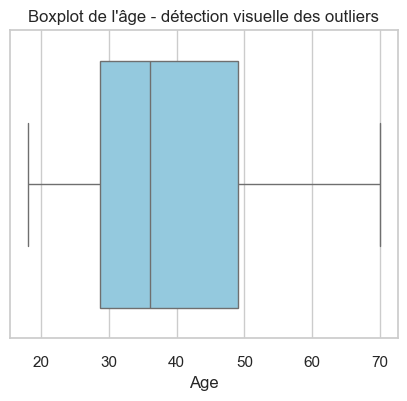

In [67]:
# Visualisation des box plot pour detecter les valeurs aberantes et connaître la distribution de la variable 

# box plot de la variable âge 

plt.figure(figsize=(5,4))                   # Créer une figure de taille personnalisé
sns.boxplot(data = data_client, x = "Age",color = "skyblue")    # Génerer un boxpot de la variable âge
plt.title("Boxplot de l'âge - détection visuelle des outliers")  # ajouter un titre
plt.show()                                  # afficher un graphique 

Ce boxplot illustre la répartition des âges des clients du centre commercial.

L’établissement est fréquenté par une clientèle variée, allant des adolescents jusqu'à des personnes âgées.
La majorité des clients sont des adultes âgés de 28 à 49 ans. La médiane, située autour de 37 ans, indique que 50 % des clients ont un âge inférieur à 37 ans, tandis que les 50 % restants ont un âge supérieur.

Aucun point atypique n’est observé au-delà des moustaches du graphique, ce qui suggère l’absence de valeurs extrêmes dans la distribution des âges.

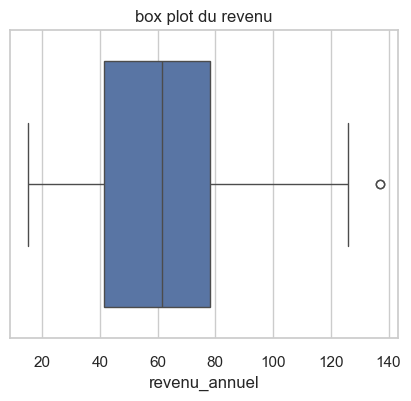

In [68]:
# box plot de la variable revenu 

plt.figure(figsize=(5,4))                                      # création d'une nouvelle figure
sns.boxplot(data = data_client, x = 'revenu_annuel')           # Génèrer un boxplot de la var revenu
plt.title("box plot du revenu")                                 # ajouter un titre 
plt.show()                                                     # afficher le graphique

Ce graphique illustre la répartition du revenu annuel des clients.

Les revenus observés s’étendent de 15 000$ à 140 000$ par an. La majorité des clients disposent d’un revenu compris entre 41 000$ et 79000$. La médiane, située autour de 61 000$, indique que 50% des clients gagnent moins de 61 000$ par an, tandis que les 50 % restants gagnent davantage.

Un seul point est observé au-delà des moustaches, ce qui correspond à une valeur atypique. Cette observation suggère l’existence d’un client dont le revenu annuel est nettement supérieur à la tendance générale.

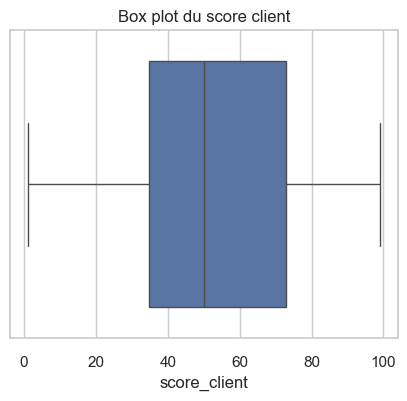

In [69]:
# box plot de la variable score client
plt.figure(figsize=(5,4))                                        # création de figure 
sns.boxplot(data = data_client, x = "score_client")              # génèrer un box plot du score client
plt.title("Box plot du score client")                            # ajouter un titre
plt.show()                                                       # afficher le graphique

Ce graphique illustre la répartition du score client, qui est une note attribuée par le centre commercial en fonction du comportement d’achat du client et de la nature de ses dépenses. Ce score est compris entre 1 et 100.

Il existe des clients avec un score faible (comportement d’achat limité) et d'autres avec un score élevé, indiquant des clients plus engagés ou fidèles.

La majorité des clients ont un score compris entre 37 % et 71 %, ce qui suggère que la plupart adoptent un comportement d’achat moyen à élevé.

La médiane se situe autour de 50 %, ce qui signifie que la moitié des clients ont un score inférieur à 50, et l’autre moitié un score supérieur.

Aucun point ne dépasse les moustaches du boxplot, ce qui indique qu’il n’existe pas de comportement d’achat extrêmement éloigné de la tendance générale.

In [70]:
detect_outliers_iqr(data_client, 'Age')

,Gender,Age,revenu_annuel,score_client


In [71]:
detect_outliers_iqr(data_client,'revenu_annuel')

,Gender,Age,revenu_annuel,score_client
198,Male,32,137,18
199,Male,30,137,83


In [72]:
detect_outliers_iqr(data_client, 'score_client')

,Gender,Age,revenu_annuel,score_client


In [73]:
# Recalcul des bornes si nécessaire
Q1 = data_client['revenu_annuel'].quantile(0.25)
Q3 = data_client['revenu_annuel'].quantile(0.75)
IQR = Q3 - Q1

borne_min = Q1 - 1.5 * IQR
borne_max = Q3 + 1.5 * IQR


In [74]:
# Moyenne avec les outliers
moyenne_avec_outliers = data_client['revenu_annuel'].mean()

# Moyenne sans les outliers
revenu_sans_outliers = data_client[
    (data_client['revenu_annuel'] >= borne_min) & 
    (data_client['revenu_annuel'] <= borne_max)
]['revenu_annuel']

moyenne_sans_outliers = revenu_sans_outliers.mean()

# Affichage
print(f"Moyenne AVEC outliers : {moyenne_avec_outliers:.2f}")
print(f"Moyenne SANS outliers : {moyenne_sans_outliers:.2f}")


Moyenne AVEC outliers : 60.56
Moyenne SANS outliers : 59.79


In [75]:
# stochage des noms dans une liste
liste = data_client.columns
liste

Index(['Gender', 'Age', 'revenu_annuel', 'score_client'], dtype='object')

# <a id="5">V. Nettoyage et traitement de données </a> 

Les données ne présentent  ni doublons ni valeurs manquantes. Il y'a ce pendant la présence 
de quelques valeurs extrêmes au niveau de la variable revenu annuel. Toutefois ces dernières ne semblent pas avoir d'impact.La moyenne du revenu sans les outliers est presque la même qu'avec celle contenant des outliers. Par conséquent le traitement n'est pas necessaire.

# <a id="6">VI. Analyse exploratoire </a> 

## a) Analyse univarié

In [76]:
# 1. statistiques descriptives de base
data_client.describe()

,Age,revenu_annuel,score_client
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [77]:
# 2. Proportions
print(data_client['Gender'].value_counts(normalize=True))

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64


In [78]:
# calcule du nombre d'intervalle avec les 3 méthodes pour les histogrammes 

# variable âge 
age = data_client['Age']                          # récuperer la colonne âge 
n = len(age)                                      # calculer le nbr d'observation
min_age = age.min()                               # calcule de l'âge minimum
max_age = age.max()                               # calcule de l'âge maximum
std_age = age.std()                               # calcule de l'écart type
iqr_age = age.quantile(0.75) - age.quantile(0.25)  # calcule de l'écart interquartile

# 1. Méthode de Sturges (pour une distribution normal)
k_sturge = int(1 + np.log2(n))  

# 2. Méthode de Scott (données proche d'une distribution normal )
h_scott = 3.5 * std_age / (n**(1/3))                # calcule de largeur de bande selon scott
k_scott = int((max_age - min_age) / h_scott)        # nbr d'intervalle = étandu divisé par largeur

# 3. Méthode de Freedman-Diaconis (basé sur l'IQR)
h_fd = 2 * iqr_age / (n ** (1/3))                  # largeur de bande 
k_fd = int((max_age - min_age) / h_fd)
  
print("Nombre d'intervalles selon Sturge : ", k_sturge)
print("Nombre d'intervalles selon Scott : ", k_scott)
print("Nombre d'intervalles selon Freedman : ", k_fd)

Nombre d'intervalles selon Sturge :  8
Nombre d'intervalles selon Scott :  6
Nombre d'intervalles selon Freedman :  7


In [79]:
# calcule du nombre d'intervalle pour le revenu 
# 3. Méthode de Freedman-Diaconis (basé sur l'IQR)

revenu = data_client["revenu_annuel"]
n = len(revenu) 
min_rev = revenu.min()                               # calcule de l'âge minimum
max_rev = revenu.max() 
iqr_rev = revenu.quantile(0.75) - revenu.quantile(0.25)

h_fd = 2 * iqr_rev / (n ** (1/3))                  # largeur de bande 
k_fd = int((max_rev - min_rev) / h_fd)
print("Nombre d'intervalles selon Freedman : ", k_fd)


Nombre d'intervalles selon Freedman :  9


In [80]:
# calcule du nombre d'intervalle selon scott
score = data_client["score_client"]
n = len(score) 
min_score = score.min()                               # calcule de l'âge minimum
max_score = score.max() 
std_score = score.std()

 
h_scott = 3.5 * std_score / (n ** (1/3))                  # largeur de bande 
k_scott = int((max_score - min_score) / h_scott)

print("Nombre d'intervalles selon Scott : ", k_scott)

Nombre d'intervalles selon Scott :  6


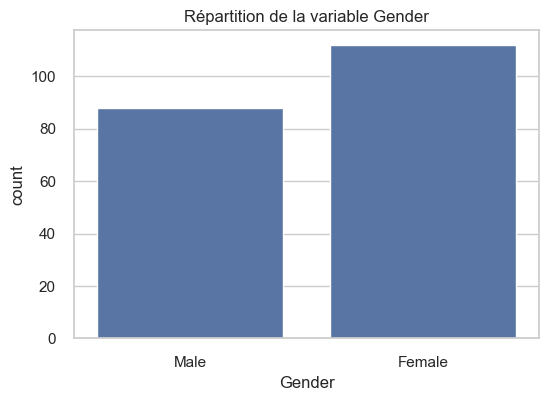

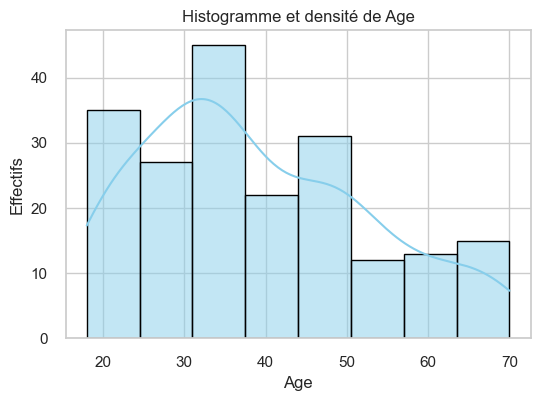

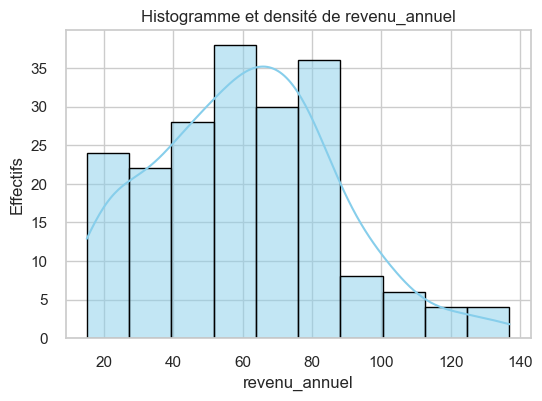

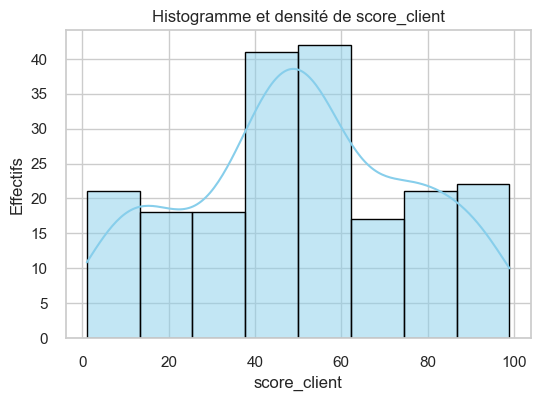

In [81]:
 
for feature in liste:
    if feature in data_client.columns:
        plt.figure(figsize=(6,4))
        
        if feature == 'Gender':
            sns.countplot(data=data_client, x=feature).set_title(f"Répartition de la variable {feature}")
        
        else:
            # determination automatique du nombre d'intervale avec la règle de friedman
            x = data_client[feature].dropna()

            # Calcul IQR
            Q1 = np.percentile(x, 25)
            Q3 = np.percentile(x, 75)
            IQR = Q3 - Q1

            n = len(x)
            # Calcul largeur de classe selon Freedman-Diaconis

            bin_width = 2 * IQR / (n ** (1/3))
            
            # Si bin_width = 0 (données constantes), on met 10 classes par défaut
            if bin_width == 0:
                bins = 10
            else:
                bins = int(np.ceil((x.max() - x.min()) / bin_width))
            sns.histplot(x, bins=bins, kde=True, color='skyblue', edgecolor='black').set_title(feature)
            plt.title(f"Histogramme et densité de {feature}")
            plt.xlabel(feature)
            plt.ylabel("Effectifs")
    plt.show()


*Graphique 1 : Représentation du genre des clients* 

Ce graphique présente la répartition des clients du centre commercial selon leur genre.
Les femmes représentent environ 55 % de la clientèle, contre 45 % pour les hommes.
Cela indique que les clientes sont légèrement majoritaires, ce qui peut orienter certaines stratégies marketing ciblées vers ce segment.

*Graphique 2 : Repartition de la distribition des âges des clients* 

Le graphique illustre la repartition des âges des  clients d'un centre commercial. La majorité des clients ont un âge compris entre de 20 et 50ans, avec une concentration plus marqué autour de la trentaine. Donc la plupart les clients de ce centre commercial sont des adultes.

*Graphique 3: Repartition de la distribition des revenus annuels des clients* 

Le graphique présente la distribution des revenus annuels des clients. 
La tranche la plus représentée se situe entre 60000 et 90000$, suivie de celle comprise entre 15000 et 50000$. Les revenus élevés (100000 à 140000$) sont moins fréquents. Celà suggère que ce centre commercial attire majoritairement une clientèle à revenus moyens ou modeste.

*Graphique 4: Repartition des scores (note attribué pour les habitudes d'achat entre 1 et 100) des clients* 

Ce graphique donne la repartition des clients en fonction de leurs score attribué. 
la majorité des clients ont un score comrpris entre 37 et 70%, ce qui indique un engagement moyen. Les scores élevés (80 à 100%) sont bien représentés, ce qui traduit la présence d'un nombre significatif de clients très fidèles et engagés.Les score faible (1 à 30%) sont également présents, ce qui suggère l'existence d'une partie de la clientèle peu engagée et occasionnelle.  En résumé le centre commercial comporte un public diversifié allant à client très fidèles à d'autres moins régulier.






## b) Analyse bivarié

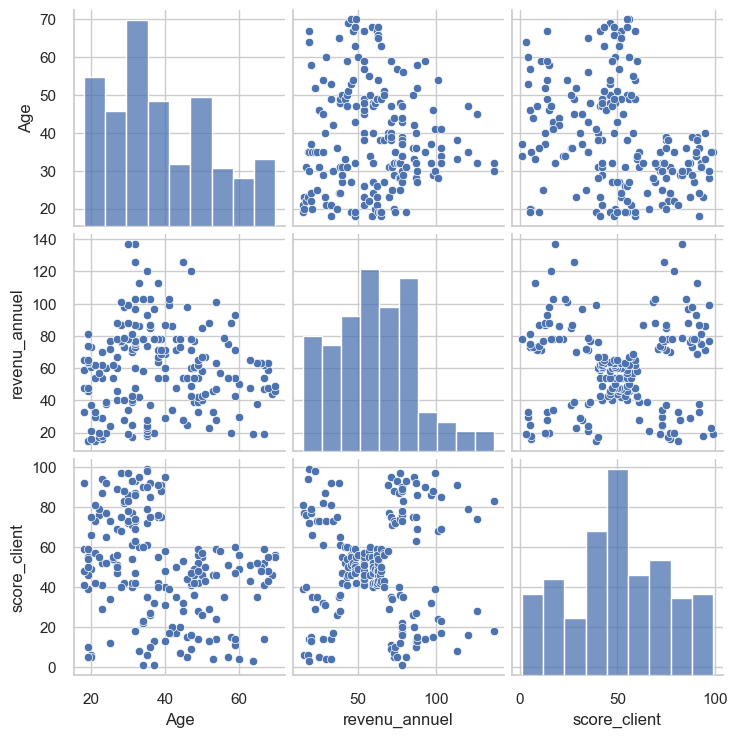

In [82]:
# Relation entre les variables quantitatives

sns.pairplot(data_client)

Ce graphique se présente sous forme de matrice qui croise les variables deux à deux. Les cases contiennent des nuages de points permettant d'observer la relation éventuelle entre différentes variables. Lorsque la même variable est croisée avec elle-même, la case correspondante contient un histogramme représentant sa distribution.

*Relation entre l'âge et le revenu*

Le nuage de points Âge vs Score ne montre pas de forme identifiable. Cela signifie qu’il n’y a pas de relation claire entre l’âge et le score. 

*Relation entre l'âge et le score client*

Le nuage de points montre un regroupement clair des clients selon leur âge et leur score. Cela suggère une relation non linéaire entre ces deux variables, ce qui pourrait être confirmé par un test statistique adapté.
Les clients jeunes, âgés entre 20 et 30 ans, ont généralement un score élevé (entre 80% et 100%) ou un score moyen (entre 40% et 70%).
En revanche, les clients plus âgés, entre 40 et 60 ans, ont plutôt un score moyen (40% à 70%) ou faible (1% à 20%).
Cette répartition indique que le score client varie différemment selon les tranches d’âge.

*Relation entre le revenu et le score client*

Le nuage de points Revenu vs Score est très dispersé, sans tendance apparente. Cela suggère qu’il n’y a pas de relation linéaire entre le revenu et le score, les deux variables semblent indépendantes.  



In [83]:
# Kendall
tau_age_revenu, pval_age_revenu = kendalltau(data_client['Age'], data_client['revenu_annuel'])
tau_age_score, pval_age_score = kendalltau(data_client['Age'], data_client['score_client'])
tau_revenu_score, pval_revenu_score = kendalltau(data_client['revenu_annuel'], data_client['score_client'])

print("\nKendall - Âge & Revenu : tau =", tau_age_revenu, ", p-val =", pval_age_revenu)
print("Kendall - Âge & Score :", tau_age_score, ", p-val =", pval_age_score)
print("Kendall - Revenu & Score :", tau_revenu_score, ", p-val =", pval_revenu_score)


Kendall - Âge & Revenu : tau = 0.008197994429319124 , p-val = 0.8656163604710495
Kendall - Âge & Score : -0.21075713867097523 , p-val = 1.2885454943561303e-05
Kendall - Revenu & Score : -0.0007650164524004127 , p-val = 0.9873451371799585


# <a id="7">VII. ACP (Analayse en composante principale) </a> 
## a) ACP linéaire
L’analyse en composantes principales la plus couramment utilisée est l’ACP linéaire, ce qui explique la standardisation préalable des données.
Cette méthode permet de réduire la dimension des données en regroupant l’information sur deux ou trois axes principaux tout en conservant un maximum de variance (information).
Au cours de ce processus, les individus présentant des caractéristiques similaires sont rapprochés, et il en va de même pour les variables.

Cependant, si les représentations obtenues ne sont pas suffisamment claires — notamment si, comme les analyses précédentes l’ont montré, il n’existe pas de relation linéaire marquée — alors une ACP non linéaire pourra être envisagée pour mieux mettre en évidence la structure des données.

In [84]:
#!pip install yellowbrick

In [85]:
# Importation des bibliothèques necessaires

from scipy.stats import pearsonr
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [86]:
data = data_client.drop(['Gender'], axis=1)
data.head(2)

,Age,revenu_annuel,score_client
0,19,15,39
1,21,15,81


In [87]:
# Standardisation des données
# Normaliser les données

scaler = StandardScaler()
data = scaler.fit_transform(data)

type(data)

numpy.ndarray

In [88]:
# affichage 
data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [89]:
# sauvegarde du tableau numpy
np.save('training_data.npy', data)

In [90]:
# application de l'ACP en 2 composantes
pca = PCA(n_components= 2)
res_pca = pca.fit_transform(data)
type(res_pca)

numpy.ndarray

In [91]:
# Affichage
res_pca

array([[-6.15720019e-01, -1.76348088e+00],
       [-1.66579271e+00, -1.82074695e+00],
       [ 3.37861909e-01, -1.67479894e+00],
       [-1.45657325e+00, -1.77242992e+00],
       [-3.84652078e-02, -1.66274012e+00],
       [-1.48168526e+00, -1.73500173e+00],
       [ 1.09461665e+00, -1.56610230e+00],
       [-1.92630736e+00, -1.72111049e+00],
       [ 2.64517786e+00, -1.46084721e+00],
       [-9.70130513e-01, -1.63558108e+00],
       [ 2.49568861e+00, -1.47048914e+00],
       [-1.45688256e+00, -1.66436050e+00],
       [ 2.01018729e+00, -1.45329897e+00],
       [-1.41321072e+00, -1.61776746e+00],
       [ 1.00042965e+00, -1.49579176e+00],
       [-1.56943170e+00, -1.62502669e+00],
       [ 2.94060318e-01, -1.49425585e+00],
       [-1.31624924e+00, -1.57216383e+00],
       [ 1.31669910e+00, -1.37243404e+00],
       [-1.43679899e+00, -1.51039469e+00],
       [ 2.88561175e-01, -1.37988135e+00],
       [-1.26018513e+00, -1.45723906e+00],
       [ 1.66684303e+00, -1.27396755e+00],
       [-9.

<function matplotlib.pyplot.show(close=None, block=None)>

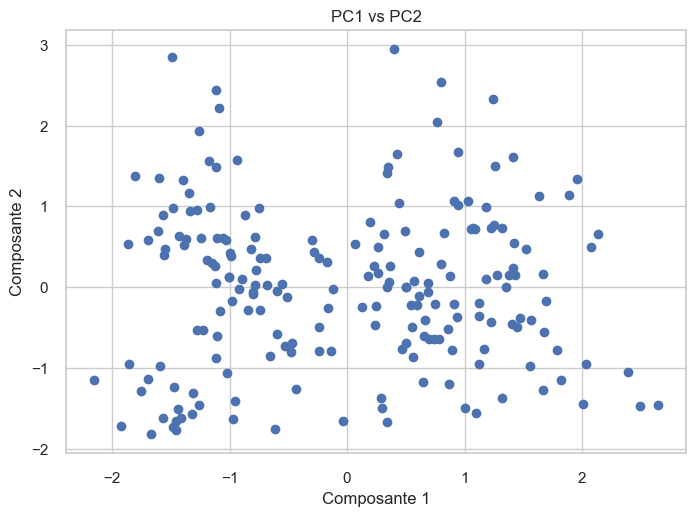

In [92]:
# visualisation des composantes principales

plt.scatter(res_pca[:, 0], res_pca[:, 1])    # les indexes correspondent aux composantes
plt.xlabel("Composante 1")
plt.ylabel("Composante 2") 
plt.title("PC1 vs PC2")
plt.show

Ce graphique montre la projection des individus sur les deux premiers composantes principales. 
Les points sont dispersés de manière aléatoire, sans formation claire de groupe ou d'autre structure apparente. Cela suggère, qu'il n'existe pas de relation linéaire marquée entre les variables initiales, ce qui rend difficile le regroupement des individus sur la base de ces deux composantes.

In [93]:
# coefficient de correlation de pearson des 2 composantes
pearsonr(res_pca[:, 0], res_pca[:, 1])

# pas de correlation linéaire entre les variables

PearsonRResult(statistic=2.0469737016526324e-16, pvalue=0.999999999999996)

## b) ACP non linéaire
L’ACP non linéaire poursuit le même objectif que l’ACP classique : réduire la dimension des données tout en conservant un maximum d’information.
Cependant, elle utilise des transformations mathématiques permettant de détecter des structures complexes, même lorsque les relations entre variables ne sont pas linéaires.
Cela permet de regrouper plus efficacement les individus dans des situations où l’ACP classique échoue.

In [94]:
# chargement des données d'entrainement précédement sauvegardé : training_data

data = np.load('training_data.npy')

In [95]:
# KPCA avec noyau 'rdf'

kpca = KernelPCA(n_components= 2, kernel='rbf')
res_kpca_rbf = kpca.fit_transform(data)
type(res_kpca_rbf)

numpy.ndarray

<function matplotlib.pyplot.show(close=None, block=None)>

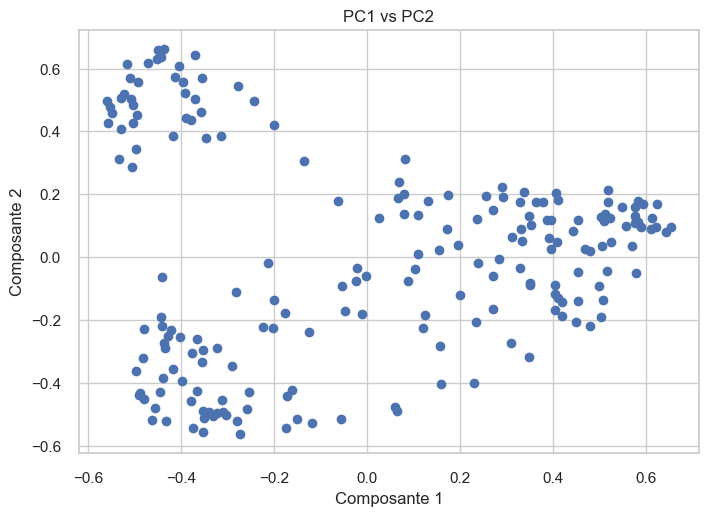

In [96]:
# Visualisation du nuage de point des deux composantes

plt.scatter(res_kpca_rbf[:, 0],  res_kpca_rbf[:, 1])    # les indexes correspondent aux composantes
plt.xlabel("Composante 1")
plt.ylabel("Composante 2") 
plt.title("PC1 vs PC2")
plt.show

Ce graphique montre la projection des individus sur les deux premières composantes principales obtenus avec l'ACP non linéaire.
Contrairement à l'ACP linéaire, où les points étaient dispresés sans structure apparente, plusieurs regroupement distincts sont observés dans le nuage de point . cela traduit une similarité des individus au sein d'un même groupe, suggérant que certains clients partagent des habitudes d'achat et des caractéristiques communes, tandis que d'autres présentent des comportements différents. 

In [97]:
# Coefficient de correlation de Pearson obtenu après KPCA
pearsonr(res_kpca_rbf[:, 0],  res_kpca_rbf[:, 1])

PearsonRResult(statistic=1.0408340855860843e-16, pvalue=1.0000000000000004)

In [98]:
# Comparaison des coefficients de Pearson

pearsonr(res_kpca_rbf[:, 0],  res_kpca_rbf[:, 1]) < pearsonr( res_pca[:, 0],  res_pca[:, 1])

True

In [99]:
# Ajout des composantes principales comme colonnes de df
data_client['x_kpca_rbd'] = res_kpca_rbf[:, 0]
data_client['y_kpca_rbd'] = res_kpca_rbf[:, 1]

In [100]:
# Cinq premières observations

data_client.head

<bound method NDFrame.head of      Gender  Age  revenu_annuel  score_client  x_kpca_rbd  y_kpca_rbd
0      Male   19             15            39   -0.173194   -0.442713
1      Male   21             15            81   -0.311457   -0.454282
2    Female   20             16             6   -0.010975   -0.180609
3    Female   23             16            77   -0.322488   -0.496770
4    Female   31             17            40   -0.056454   -0.515875
..      ...  ...            ...           ...         ...         ...
195  Female   35            120            79   -0.242831    0.496856
196  Female   45            126            28    0.079921    0.199623
197    Male   32            126            74   -0.199136    0.420269
198    Male   32            137            18    0.026057    0.124264
199    Male   30            137            83   -0.135067    0.307300

[200 rows x 6 columns]>

In [101]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = data_client.iloc[:, 1:].values
y = data_client.iloc[:, [0]].values

# <a id="8">VIII. Segmentation clients via k-means</a>

In [102]:
# clustering avec 3 clusters

cluster_model = KMeans(n_clusters=3)
cluster_model.fit(res_kpca_rbf)
clusters = cluster_model.predict(res_kpca_rbf)

# il existe plusieurs méthodes pour choisir le nombre de cluster
# et l'une des méthodes les plus utilisé est celle de la méthode de coude


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [103]:
# Affichage des clusters
clusters

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

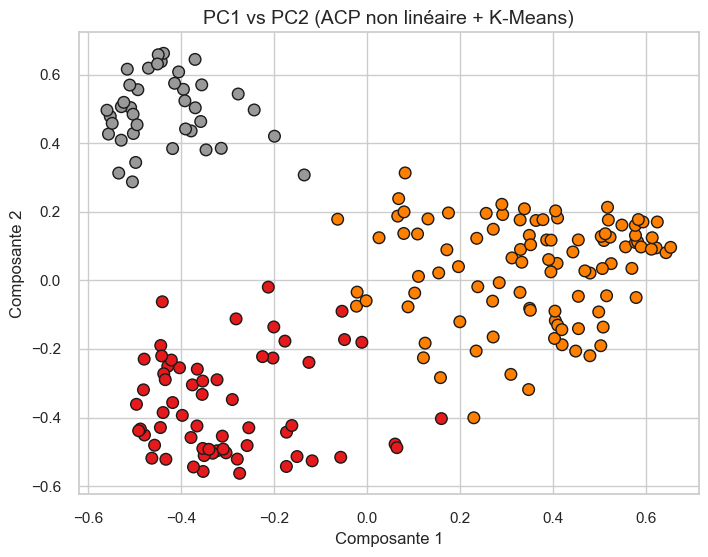

In [104]:
# Visualisation des clusters
# Création d'une palette de couleurs distinctes
colors = plt.cm.Set1(np.linspace(0, 1, len(np.unique(clusters))))

plt.figure(figsize=(8,6))
plt.scatter(
    res_kpca_rbf[:, 0], 
    res_kpca_rbf[:, 1], 
    c=[colors[i] for i in clusters],  # Couleur selon le cluster
    s=70,                              # Taille des points
    edgecolors='k'                     # Contour noir
)
plt.xlabel("Composante 1", fontsize=12)
plt.ylabel("Composante 2", fontsize=12)
plt.title("PC1 vs PC2 (ACP non linéaire + K-Means)", fontsize=14)
plt.show()

Le graphique représente les individus projetés sur les deux premières composantes principales obtenus par KERNEL PCA avec noyau RBF, et colorés selon le clusters identifiés par l'algorithme k-means.

Les deux axes (composante 1 et composante2) représentent les directions principales capturant la majorité de la variance (information) après la transformation non linéaire des données.
Les individus (les points) dans ce plan partagent des caractéristiques similaires selon les variables initiales transformées par la KPCA.
Chaque couleur correspond à un cluster (groupe) identifié par K-means.
Les groupes qui sont bien séparés indiquent une segmentation efficaces des données, tandis que les groupes qui ont des individus qui se rapprochent montrent des frontières moins nettes entre les groupes.

Et donc le K-means parvient à bien identifier les groupes distincts, ce pendant les zones mélangées suggèrent que la frontière entre certaines groupes n'est pas parfaitement nette.


In [105]:
# Installation du bibliothèque yellowbrick pour effectuer la méthode de coude

# !pip install yellowbrick

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

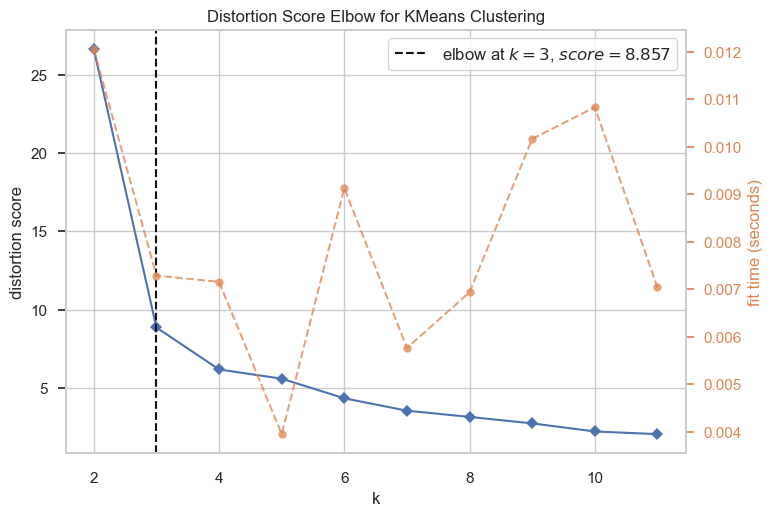

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [106]:
# Méthode de coude

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()  # ← ici, on utilise un nom différent

visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(res_kpca_rbf)
visualizer.show()

In [107]:
# Ajout des clusters à df et sauvegarde au format csv

data_client['cluster_kpca_rbf'] = clusters
data_client.to_csv('data_with_clusters.csv')

# <a id="9">IX. Interprétation des groupes</a>

In [108]:
# chargement des données 

df = pd.read_csv('data_with_clusters.csv')

In [109]:
# afficher les 5 premières lignes
df.head

<bound method NDFrame.head of      Unnamed: 0  Gender  Age  revenu_annuel  score_client  x_kpca_rbd  \
0             0    Male   19             15            39   -0.173194   
1             1    Male   21             15            81   -0.311457   
2             2  Female   20             16             6   -0.010975   
3             3  Female   23             16            77   -0.322488   
4             4  Female   31             17            40   -0.056454   
..          ...     ...  ...            ...           ...         ...   
195         195  Female   35            120            79   -0.242831   
196         196  Female   45            126            28    0.079921   
197         197    Male   32            126            74   -0.199136   
198         198    Male   32            137            18    0.026057   
199         199    Male   30            137            83   -0.135067   

     y_kpca_rbd  cluster_kpca_rbf  
0     -0.442713                 0  
1     -0.454282      

In [110]:
df['cluster_kpca_rbf'].unique()

array([0, 1, 2], dtype=int64)

In [111]:
# centroide : connaître les caractéristiques des clusters

df.select_dtypes(include='number').groupby(df['cluster_kpca_rbf']).mean()


,Unnamed: 0,Age,revenu_annuel,score_client,x_kpca_rbd,y_kpca_rbd,cluster_kpca_rbf
cluster_kpca_rbf,,,,,,,
0,57.467742,25.500000,42.080645,57.677419,-0.302097,-0.366981,0.0
1,101.595960,49.636364,61.898990,32.939394,0.359737,0.034942,1.0
2,161.000000,32.692308,86.538462,82.128205,-0.432920,0.494706,2.0


Le tableau présente les caractéristiques des différents groupes identifiés par le clustering.

* Groupe 1 : Clients occasoinnels

Âge moyen : 50 ans
Revenu moyen : 62 000 $
Score moyen : 33 %
Interprétation : Ce groupe regroupe des clients d’âge avancé, au revenu moyen ou modeste, et peu engagés, donc clients occasionnels.

* Groupe 2 : Clients moyennement fidèles

Âge moyen : 25 ans
Revenu moyen : 43 000 $
Score moyen : 57 %
Interprétation : Ce groupe correspond à des clients jeunes, avec un revenu relativement faible, et un engagement moyen.

* Groupe 3 : Clients fidèles ou premium

Âge moyen : 33 ans
Revenu moyen : 87 000 $
Score moyen : 82 %
Interprétation : Ce groupe rassemble des jeunes adultes avec un revenu élevé et un engagement très fort, représentant donc les clients les plus fidèles.




# <a id="10">X. Conclusion</a>

Cette étude analyse les habitudes d’achat des clients d’un centre commercial dans le but d’identifier différents profils (occasionnels, fidèles, premium) et d’adapter les stratégies marketing en conséquence.

Les principaux enseignements sont les suivants :

Profil démographique : La majorité des clients sont des femmes, et le centre attire principalement des jeunes adultes, avec un âge moyen situé autour de la trentaine. La plupart disposent d’un revenu modeste.

Segmentation des clients : Trois catégories distinctes se dégagent :

* Clients occasionnels : généralement d’âge plus avancé, avec un revenu moyen. Une stratégie adaptée serait de proposer des produits correspondant à leurs besoins, à des prix accessibles.

* Clients moyennement fidèles : très jeunes, avec un revenu faible. Pour les fidéliser davantage, il serait pertinent de mettre en place des réductions ciblées ou des offres spéciales sur les produits qu’ils consomment le plus.

* Clients premium : jeunes adultes, disposant d’un revenu élevé et très engagés. Ce segment représente une clientèle stratégique, à qui le centre devrait offrir des produits haut de gamme, des services exclusifs et des avantages VIP.
